## Импорт необходимых библиотек

In [130]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
from datetime import date
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [131]:
users_data = pd.read_json('/Users/okti/Desktop/users.json')

In [132]:
users_df = pd.DataFrame(users_data)

## Посмотрим на столбцы 

In [133]:
non_null_counts = users_df.count()

non_null_df = pd.DataFrame(non_null_counts, columns=['Non-Null Count'])

sorted_non_null_df = non_null_df.sort_values(by='Non-Null Count', ascending=False)

display(sorted_non_null_df)

,Non-Null Count
tag,8030
karma,7839
rating,7627
В рейтинге,7627
Зарегистрирован,7627
Значки,6147
Состоит в хабах,5964
Откуда,3938
Подписан на компании,3311
Дата рождения,2591


## Удалим столбцы с избыточной информацией (О себе, Приглашена, Пригласила на сайт)

In [105]:
users_df = users_df.drop(columns = ['О себе', 'Приглашена', 'Пригласила на сайт'])
users_df.head()

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,Специализация
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,NaN,NaN,NaN,NaN,NaN,NaN
1,@eresik,27.0,0.0,Не участвует,2010-05-11,Захабренный,"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,Захабренный,NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,Захабренный,"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,Захабренный Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,"Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN


## Добавим столбец с возрастом пользователя

In [106]:
today = date.today()
users_df['Возраст'] = (today.year - pd.to_datetime(users_df['Дата рождения']).dt.year)
users_df['Возраст'] = users_df['Возраст'].fillna(-1).astype(int)


def categorize_age(age):
    if age >= 0 and age <= 18:
        return 'молодой'
    elif age > 18 and age <= 60:
        return 'взрослый'
    elif age > 60:
        return 'пожилой'
    else:
        return 'неизвестно' 

users_df['Возраст'] = users_df['Возраст'].map(categorize_age)

display(users_df)

,tag,karma,rating,В рейтинге,Зарегистрирован,Значки,Откуда,Дата рождения,Состоит в хабах,Подписан на компании,Работает в,Специализация,Возраст
0,@kirillkirill000,0.0,0.0,Не участвует,2017-10-14,Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,NaN,NaN,NaN,NaN,NaN,NaN,неизвестно
1,@eresik,27.0,0.0,Не участвует,2010-05-11,Захабренный,"Ростов-на-Дону, Ростовская обл., Россия",1980-01-07,"[.NET, 1C, 1С-Bitrix, Accessibility, Action Sc...",[Timeweb Cloud],NaN,NaN,взрослый
2,@zamboga,2.0,0.0,Не участвует,2012-06-25,Захабренный,NaN,NaN,"[AR and VR, DIY, GTD, Habr, Car Gadgets, Astro...",NaN,NaN,NaN,неизвестно
3,@ParaPilot,3.0,0.0,Не участвует,2013-04-12,Захабренный,"Москва, Москва и Московская обл., Россия",1988-12-22,"[.NET, 3D printers, Ajax, API, AR and VR, ASP,...",NaN,NaN,NaN,взрослый
4,@Ezik85,4.0,0.0,Не участвует,2011-10-10,Захабренный Бета-тестер ▇▅▄▅▅▄ ▇▄▅ Знаток Хабра,"Казань, Татарстан, Россия",1985-06-11,"[DIY, Health, IOT, Server Administration, Syst...","[Туту.ру, VK]",NaN,NaN,взрослый
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,@BJM,4.0,0.0,Не участвует,2018-02-27,Захабренный,NaN,NaN,NaN,NaN,NaN,NaN,неизвестно
8027,@maksasila,-3.0,0.0,Не участвует,2006-10-01,Отхабренный,"Meckenbeuren, Baden-Württemberg, Германия",NaN,"[Kubernetes, Antivirus protection, Virtualizat...",[Яндекс],NaN,NaN,неизвестно
8028,@Tempest,0.0,0.0,Не участвует,2011-10-17,NaN,NaN,NaN,"[*nix, Ajax, AR and VR, Assembler, C++, DIY, E...",[VK],NaN,NaN,неизвестно
8029,@speakingfish,15.0,0.0,Не участвует,2013-03-01,Захабренный,"Yerevan, Yerevan, Армения",1972-03-08,"[*nix, .NET, 1C, 1С-Bitrix, 3D printers, Acces...","[Flipper Devices Inc., Хабр Карьера]",NaN,NaN,взрослый


 ## Посмотрим распределение участников сообщества по возрасту

Возраст
неизвестно    5440
взрослый      2517
пожилой         64
молодой         10
Name: count, dtype: int64

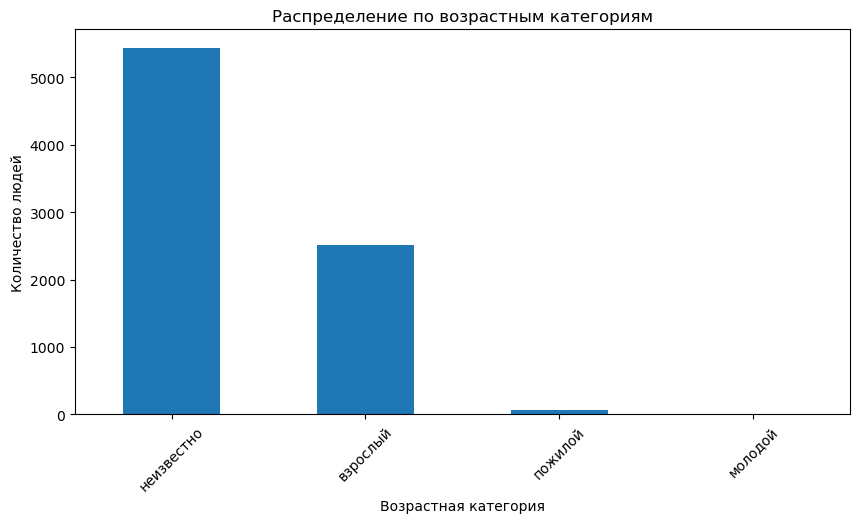

In [114]:
plt.figure(figsize=(10, 5))

age_categories_counts = users_df['Возраст'].value_counts()

display(age_categories_counts)

age_categories_counts.plot(kind='bar')

plt.title('Распределение по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество людей')

plt.xticks(rotation=45)  # Поворот меток на оси X для лучшей читаемости
plt.show()



## Пострим простой граф для просмотра кармы пользователей

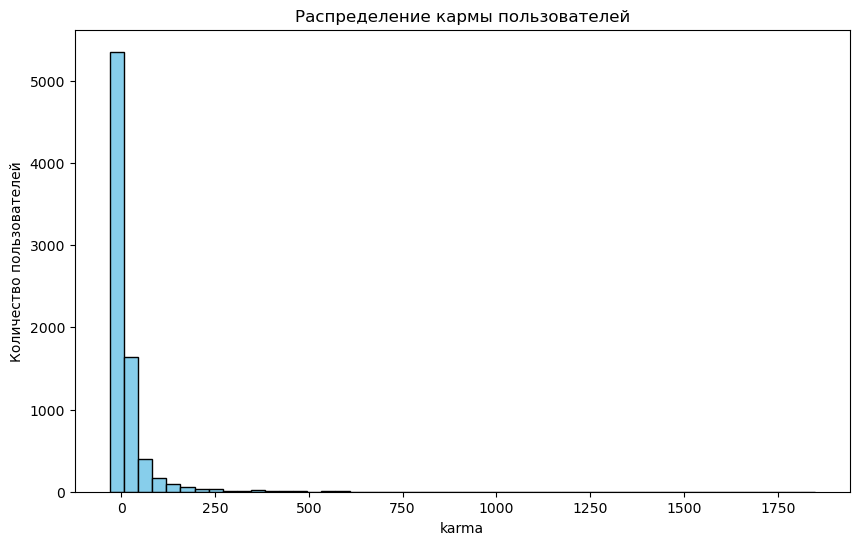

In [139]:
plt.figure(figsize=(10, 6))  
plt.hist(df['karma'], bins=50, color='skyblue', edgecolor='black')  
plt.title('Распределение кармы пользователей')  
plt.xlabel('karma')  
plt.ylabel('Количество пользователей')  
plt.show()  

## Построим граф для просмотра количества регистраций (Его я не сделал)

## Построим граф для просмотра связности сообществ

In [165]:
df = pd.DataFrame(users_data)

df['Состоит в хабах'] = df['Состоит в хабах'].apply(lambda x: x if isinstance(x, list) else [])


In [166]:
G = nx.Graph()

for hubs in df['Состоит в хабах']:
    for hub1 in hubs:
        for hub2 in hubs:
            if hub1 != hub2:
                if G.has_edge(hub1, hub2):
                    G[hub1][hub2]['weight'] += 1
                else:
                    G.add_edge(hub1, hub2, weight=1)

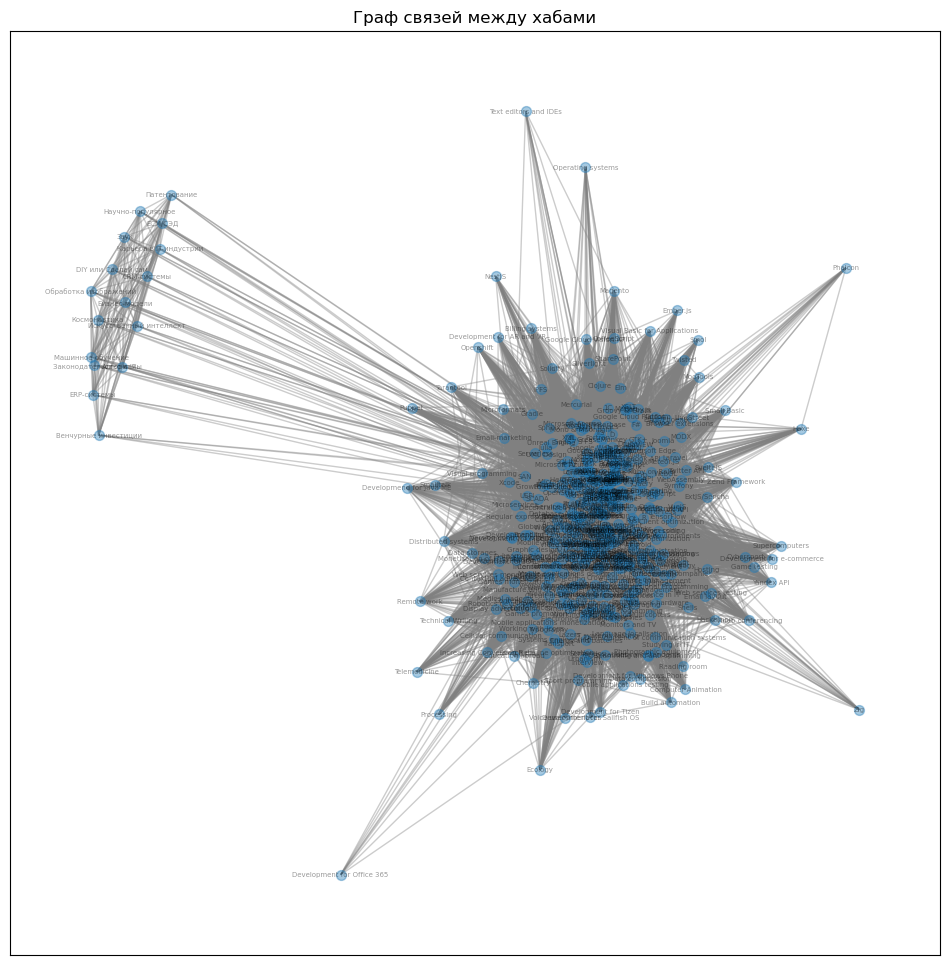

In [167]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx(G, pos, node_size=50, edge_color='gray', alpha=0.4, with_labels=True, font_size=5)
plt.title('Граф связей между хабами')
plt.show()

In [168]:
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Топ-5 хабов по центральности:")
for hub, value in sorted_centrality:
    print(f"{hub}: {value}")


Топ-5 хабов по центральности:
GTD: 0.9390519187358916
DIY: 0.9367945823927765
Habr: 0.927765237020316
Python: 0.9164785553047403
Big Data: 0.9119638826185101


In [169]:
df = pd.DataFrame(users_data)



## Старый граф по связности сообществ

In [170]:
users_file = "/Users/okti/Desktop/users.json"
G = nx.Graph()

names = []
with open(users_file, "r") as f:
    users_data = json.load(f)
    i = 0
    for user in users_data:
        if i < 10:
            if 'Состоит в хабах' in user:
                for tag in user['Состоит в хабах']:
                    if user["tag"] not in G:
                        G.add_node(user["tag"], type='user')
                    if tag not in G:
                        G.add_node(tag, type='tag')
                    G.add_edge(user["tag"], tag)
        i += 1


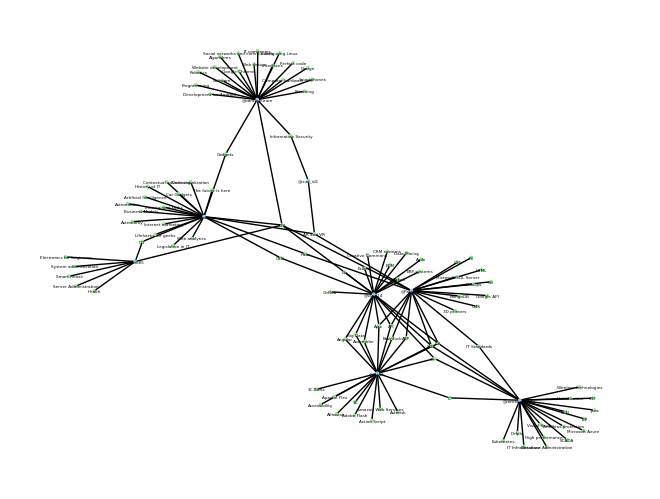

In [171]:
color_map = []

pos = nx.spring_layout(G, k=1000, iterations=20)

for node in G:
    if G.nodes[node]['type'] == 'user':
        color_map.append('skyblue')
    else:
        color_map.append('lightgreen')

nx.draw(G, with_labels=True, node_size = 3, node_color=color_map, font_size=3)
plt.show()
